In [1]:
# Automatic differntiation
import numpy as np
import torch

In [2]:
x = torch.tensor(2.0,requires_grad=True)

In [3]:
y = 2*x**4 + x**3 + 3*x**2 + 5*x +1

In [4]:
print(y)

tensor(63., grad_fn=<AddBackward0>)


In [5]:
y.backward()

In [6]:
x.grad  # derivitive at the point, slope of th epolynomial at the point (2,62)

tensor(93.)

In [7]:
x = torch.tensor([[1.,2.,3.],[3.,2.,1.]], requires_grad=True)

In [8]:
x

tensor([[1., 2., 3.],
        [3., 2., 1.]], requires_grad=True)

In [9]:
y = 3*x + 2

In [10]:
y

tensor([[ 5.,  8., 11.],
        [11.,  8.,  5.]], grad_fn=<AddBackward0>)

In [11]:
z = 2*y**2

In [12]:
z

tensor([[ 50., 128., 242.],
        [242., 128.,  50.]], grad_fn=<MulBackward0>)

In [13]:
out = z.mean()

In [14]:
out

tensor(140., grad_fn=<MeanBackward0>)

In [15]:
out.backward()

In [16]:
x.grad

tensor([[10., 16., 22.],
        [22., 16., 10.]])

In [17]:
y.grad

C:\Users\sueok\AppData\Local\Temp/ipykernel_21636/486760323.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information.
  y.grad


In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
import torch.nn as nn

In [21]:
X = torch.linspace(1,50,50).reshape(-1,1)

In [24]:
torch.manual_seed(71)
e = torch.randint(-8,9,(50,1), dtype=torch.float)

In [26]:
y = 2*X + 1 + e

In [27]:
y.shape

torch.Size([50, 1])

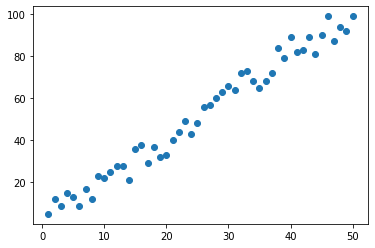

In [28]:
plt.scatter(X.numpy(), y.numpy())

In [29]:
torch.manual_seed(59)
model = nn.Linear(in_features=1,out_features=1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [30]:
class Model(nn.Module):
    def __init__(self,in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
        
    def forward(self,x):
        y_pred =self.linear(x)
        return y_pred

In [31]:
torch.manual_seed(59)
model = Model(1,1)
print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [32]:
for name, param in model.named_parameters():
    print(name, '\t', param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


In [33]:
x = torch.tensor([2.0])

In [34]:
print(model.forward(x))

tensor([1.1758], grad_fn=<AddBackward0>)


In [38]:
w1 = 0.1059
b1 = 0.9637

x1 = np.linspace(0.0,50.0,50)

y1 = w1*x1 + b1

In [43]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.001)

In [44]:
epochs = 50
losses = []

for i in range(epochs):
    i = i + 1
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    losses.append(loss)
    print(f"epoch {i} loss : {loss.item()} weight : {model.linear.weight.item()}, bias : {model.linear.bias.item()}")
    optimizer.zero_grad()
    
    loss.backward()
    optimizer.step()

epoch 1 loss : 3057.216796875 weight : 0.10597813129425049, bias : 0.9637961387634277
epoch 2 loss : 1588.5311279296875 weight : 3.334900379180908, bias : 1.0604636669158936
epoch 3 loss : 830.2999877929688 weight : 1.0148327350616455, bias : 0.9922628402709961
epoch 4 loss : 438.8524169921875 weight : 2.6817996501922607, bias : 1.0425218343734741
epoch 5 loss : 236.7615203857422 weight : 1.4840211868286133, bias : 1.0076650381088257
epoch 6 loss : 132.4291229248047 weight : 2.3446059226989746, bias : 1.0339646339416504
epoch 7 loss : 78.56572723388672 weight : 1.7262253761291504, bias : 1.0163217782974243
epoch 8 loss : 50.75775909423828 weight : 2.170504093170166, bias : 1.0302516222000122
epoch 9 loss : 36.4012336730957 weight : 1.8512457609176636, bias : 1.0214954614639282
epoch 10 loss : 28.989229202270508 weight : 2.0806007385253906, bias : 1.029038906097412
epoch 11 loss : 25.162382125854492 weight : 1.9157683849334717, bias : 1.0248701572418213
epoch 12 loss : 23.18647384643554

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

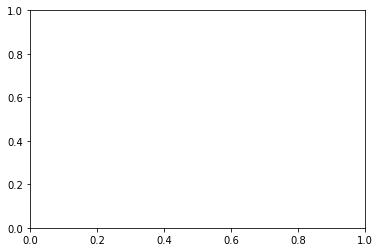

In [45]:
plt.plot(range(epochs), losses)
plt.ylabel('MSE LOSS')
plt.xlabel('Epoch')